In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams,font_manager
import scipy.stats as sts
from matplotlib.ticker import FormatStrFormatter

In [2]:
rcParams['figure.figsize'] = (8,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
fig_direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/figures/'
#fig_direc = 'C:/Users/Luigi/Documents/GitHub/ibs-dev/figures/'

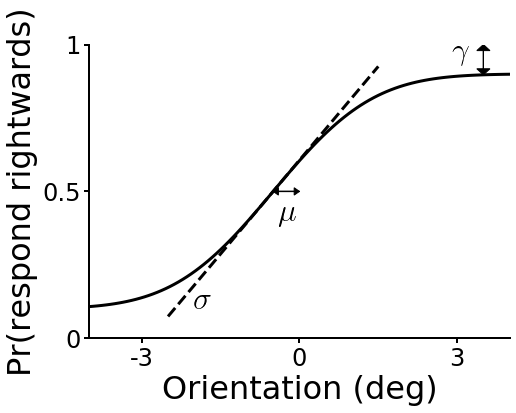

In [53]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))


mu = -0.5
sigma = 1.5
gamma = 0.2
y = np.linspace(mu-2,mu+2,100)
x = np.linspace(-4,4,100)
ax.text(-2,0.1,'$\sigma$',usetex=True)

ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([0,1])
ax.plot(y,1/2+sts.norm.pdf(0)*(1-gamma)*(y-mu)/sigma,color='black',linestyle='dashed')
ax.plot(x,gamma/2 +(1-gamma)*sts.norm.cdf((x-mu)/sigma),color='black')
ax.set_xlabel('Orientation (deg)')
ax.set_ylabel('Pr(respond rightwards)')
ax.set_xticks([-3,0,3])
ax.set_yticks([0,0.5,1])

x = 3.5
y = gamma/2 +(1-gamma)*sts.norm.cdf((x-mu)/sigma)
ax.arrow(x,y,0,1-y,shape='full',head_width=0.25, head_length=(1-y)/5,length_includes_head=True,color='black')
ax.arrow(x,1,0,y-1,shape='full',head_width=0.25, head_length=(1-y)/5,length_includes_head=True,color='black')
ax.text(x-0.6,y+(1-y)/2,'$\gamma$',usetex=True)

x = mu
y = 0.5
ax.arrow(0,y,x,0,shape='full',head_width=0.025, head_length=-x/5,length_includes_head=True,color='black')
ax.arrow(x,y,-x,0,shape='full',head_width=0.025, head_length=-x/5,length_includes_head=True,color='black')
ax.text(mu+0.1,0.4,'$\mu$',usetex=True)
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.22)

fig.savefig(fig_direc + 'model_fig_psycho.pdf')
plt.show()

In [5]:
from scipy.spatial.distance import cdist

kappa_1 = 10
kappa_2 = 25

all_s = np.linspace(0,90,100) #true orientation difference in degrees

x = sts.vonmises.rvs(loc=0,kappa=kappa_1,size=[100000,12])
pc_kappa_1 = np.array([np.mean(np.argmin(np.abs(np.pi-np.mod(np.array([np.pi/180*s] + [0]*5)+x[:,:6]-x[:,6:],2*np.pi)),axis=1)==0) 
                       for s in all_s])
x = sts.vonmises.rvs(loc=0,kappa=kappa_2,size=[100000,12])
pc_kappa_2 = np.array([np.mean(np.argmin(np.abs(np.pi-np.mod(np.array([np.pi/180*s] + [0]*5)+x[:,:6]-x[:,6:],2*np.pi)),axis=1)==0) 
                       for s in all_s])

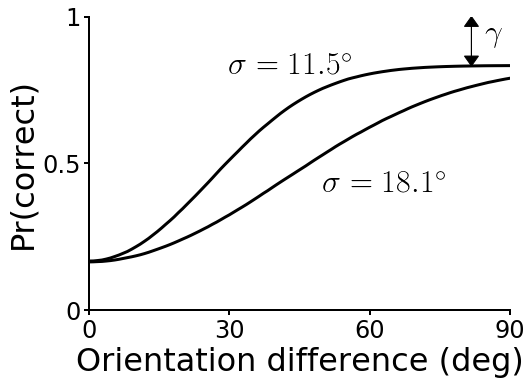

In [6]:
gamma = 0.2

fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

x = all_s

ax.plot(x,gamma/6 + (1-gamma)*pc_kappa_1,color='black')
ax.plot(x,gamma/6 + (1-gamma)*pc_kappa_2,color='black')

ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([0,1])
ax.set_xlabel('Orientation difference (deg)')
ax.set_ylabel('Pr(correct)')
ax.set_xticks([0,30,60,90])
ax.set_yticks([0,0.5,1])

x = all_s[90]
y = gamma/6 + (1-gamma)*pc_kappa_2[90]
ax.arrow(x,y,0,1-y,shape='full',head_width=3, head_length=(1-y)/5,length_includes_head=True,color='black')
ax.arrow(x,1,0,y-1,shape='full',head_width=3, head_length=(1-y)/5,length_includes_head=True,color='black')
ax.text(x+3,y+(1-y)/2,'$\gamma$',usetex=True)

ax.text(30,0.8,'$\sigma=11.5^\circ$',usetex=True)
ax.text(50,0.4,'$\sigma=18.1^\circ$',usetex=True)

fig.subplots_adjust(bottom=0.2,right=0.95,left=0.22)
fig.savefig(fig_direc + 'model_fig_vstm.pdf')

plt.show()
